In [25]:
# Basic imports
import pandas as pd
import numpy as np
import zipfile
import os

# For text processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# ML model
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To visualize results
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
with open('True.csv', 'rb') as f:
    header = f.read(4)
    
print(header)

b'titl'


In [26]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'decisiontree.ipynb', 'fake new detection(ml).ipynb', 'Fake.csv', 'Fake.csv.zip', 'randomforest.ipynb', 'salaries.csv', 'svm.ipynb', 'True.csv', 'True.csv.zip', 'Untitled.ipynb']


In [27]:
with zipfile.ZipFile('Fake.csv.zip', 'r') as zip_ref:
    zip_ref.extractall() 

In [28]:
import pandas as pd

true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

print(true_df.head())
print(fake_df.head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

In [29]:


true_df['label'] = 1   # Real news
fake_df['label'] = 0  # Fake news

df = pd.concat([true_df, fake_df], ignore_index=True)

print(df.head())
print(df['label'].value_counts())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  
label
0    23481
1    21417
Name: count, dtype: int64


In [34]:
#check missing values
print(df.isnull().sum())

# Drop rows with missing values if any (optional)
df = df.dropna()

df.head()

title         0
text          0
subject       0
date          0
label         0
clean_text    0
dtype: int64


,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters the head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters the special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattle washington reuters president donal...


In [35]:
#lowercase removing punctuation and extra whitespace
import re
def clean_text(text):
    text=text.lower()
    text=re.sub(r'\W',' ',text)
    text=re.sub(r'\s',' ',text)
    return text.strip()
df['clean_text']=df['text'].apply(clean_text)
df['clean_text']

0        washington  reuters    the head of a conservat...
1        washington  reuters    transgender people will...
2        washington  reuters    the special counsel inv...
3        washington  reuters    trump campaign adviser ...
4        seattle washington  reuters    president donal...
                               ...                        
44893    21st century wire says as 21wire reported earl...
44894    21st century wire says it s a familiar theme  ...
44895    patrick henningsen  21st century wireremember ...
44896    21st century wire says al jazeera america will...
44897    21st century wire says as 21wire predicted in ...
Name: clean_text, Length: 44898, dtype: object

In [37]:
#training and testing
from sklearn.model_selection import train_test_split
x=df['clean_text']
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
len(x_train)

35918

In [39]:
len(x_test)

8980

In [40]:
#converting into numerical representation using tf-idf method
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)
x_train_tfidf=vectorizer.fit_transform(x_train)
x_test_tfidf=vectorizer.transform(x_test)

In [41]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf,y_train)
print("Model training complete")

Model training complete


In [42]:
#predict on test set
y_pred=model.predict(x_test_tfidf)
model.score(x_test_tfidf,y_test)
accuracy_score(y_test,y_pred)

0.9888641425389755

In [43]:
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



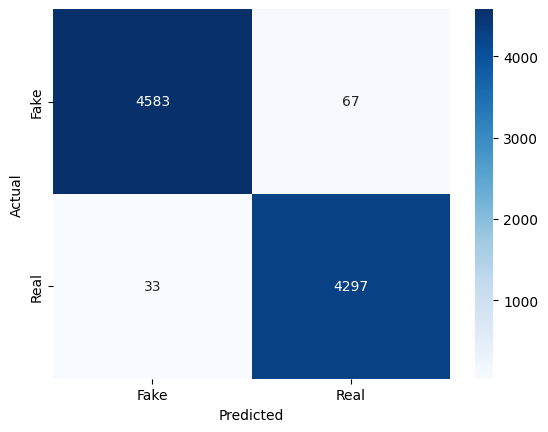

In [44]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
def predict_news(text):
    text_vec=vectorizer.transform([text])
    pred=model.predict(text_vec)[0]
    return "Real News" if pred==1 else "Fake news"
sample_text="The government has announced new policies for economic growth."
print(predict_news(sample_text))
print(predict_news("NASA launched a rover to explore Mars today."))
# Should likely return: Real News

print(predict_news("Cure for cancer found in Himalayan herbs!"))
# Should likely return: Fake News
print(predict_news("The government announced a major education reform today."))  # Real
print(predict_news("Aliens spotted in Antarctica, claims anonymous source."))    # Fake


Fake news
Fake news
Fake news
Fake news
Fake news


In [50]:
print(len(true_df), len(fake_df))

21417 23481


In [55]:
# See prediction output
text = "NASA launches new space telescope to explore distant galaxies."
text_vec = vectorizer.transform([text])
print("Raw prediction:", model.predict(text_vec))
print("Predicted probabilities:", model.predict_proba(text_vec))


Raw prediction: [0]
Predicted probabilities: [[0.83414716 0.16585284]]


In [56]:
text = """The Indian government has passed a bill in Parliament 
to increase investment in rural education and healthcare. 
This is part of a larger reform announced during the 2025 budget session."""
print(predict_news(text))  

Real News


In [59]:
 #Input from user
user_text = input("Enter the news content: ")

# Predict using your function
result = predict_news(user_text)

# Show result
print("Prediction:", result)


Enter the news content:  A secret government document leaked by an anonymous source claims that the recent rise in earthquakes is due to a top-secret military experiment being conducted under the Himalayan mountains. The document alleges that the government is using underground sound wave weapons to test tectonic destabilization as part of a global control agenda. Although no mainstream media has reported on this, several YouTube channels and independent bloggers have confirmed the story using unidentified insider sources. Critics argue that this explains the unusual weather patterns and increase in volcanic activity around the world


Prediction: Fake news


In [61]:
import joblib
joblib.dump(model,'model.pkl')
joblib.dump(vectorizer,'tfidf.pkl')
print("model and vectorizer saved successfully")

model and vectorizer saved successfully
